In [2]:
import numpy as np
import uncertainties as u
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.rcParams['figure.figsize'] = (20, 16)
%matplotlib inline
#%ls

In [20]:
#load in our voltage and current data:
xAxisHelm = np.genfromtxt('helmFieldX.txt', delimiter=', ', skip_header=True)
yAxisHelm = np.genfromtxt('helmFieldY.txt', delimiter=', ', skip_header=True)

xAxisQuad = np.genfromtxt('quadFieldX.txt', delimiter=', ', skip_header=True)
yAxisQuad = np.genfromtxt('quadFieldY.txt', delimiter=', ', skip_header=True)
#print(xAxisHelm)

# convert voltage into current
radialVoltsPerFieldRatio = u.ufloat(1970, 5) #u.ufloat(1765, 5) # V/T ratio derived from our sensor calibration

def convert_volts_to_field(array):
    errorList = []
    for i in range(len(array)):
        errorList.append((array[i,1]/radialVoltsPerFieldRatio).s) # stores the error from the calculation
        array[i,1] = (array[i,1]/radialVoltsPerFieldRatio).n # takes the actuall value in the uncertinties package ignoring error for now
    return array, errorList

yAxisHelm, yAxisHelmError = convert_volts_to_field(yAxisHelm)
yAxisQuad, yAxisQuadError = convert_volts_to_field(yAxisQuad)

# allign starting locations and allign center of coils to zero
#print('before offset: ', yAxisHelm[0,0], yAxisQuad[0,0])
def offset_dataset(array, offset, axis=0):
    if axis == 0:
        for i in range(len(array)):
            array[i,0] = array[i,0]+offset
        return array
    elif axis == 1:
        for i in range(len(array)):
            array[i,1] = array[i,1]+offset
        return array

yAxisHelm = offset_dataset(yAxisHelm, -14) # measured offsets from our aparatus
yAxisQuad = offset_dataset(yAxisQuad, -15)
#print('after offset: ', yAxisHelm[0,0], yAxisQuad[0,0])


# zero the field from measuremnts of the earth's field with the coils turned off:
earthField = -1*(0.049/radialVoltsPerFieldRatio).n
yAxisHelm = offset_dataset(yAxisHelm, earthField, axis=1)
yAxisQuad = offset_dataset(yAxisQuad, earthField, axis=1)
print(yAxisHelm[-7,1],yAxisQuad[-3,1])


# calculate the field from one coil by subtracting the quad data from the helm data
# this only works on the subset of the data that has the same positional coords

#yOneCoil = [yAxisHelm[0:43,1] - yAxisQuad[0:43,1]+ yAxisHelm[0:43,0]]
yCoilOne = np.zeros((43,2))
for i in range(43):
    yCoilOne[i,1] = (yAxisHelm[i,1]+yAxisQuad[i,1])/2
    yCoilOne[i,0] = yAxisHelm[i,0]
    
yCoilTwo = np.zeros((43,2))
for i in range(43):
    yCoilTwo[i,1] = (yAxisHelm[i,1]-yAxisQuad[i,1])/2
    yCoilTwo[i,0] = yAxisHelm[i,0]
    
yCoilTwoInverted = np.zeros((43,2))
for i in range(43):
    yCoilTwoInverted[i,1] = -(yAxisHelm[i,1]-yAxisQuad[i,1])/2
    yCoilTwoInverted[i,0] = yAxisHelm[i,0]
   

7.61421319797e-06 0.0


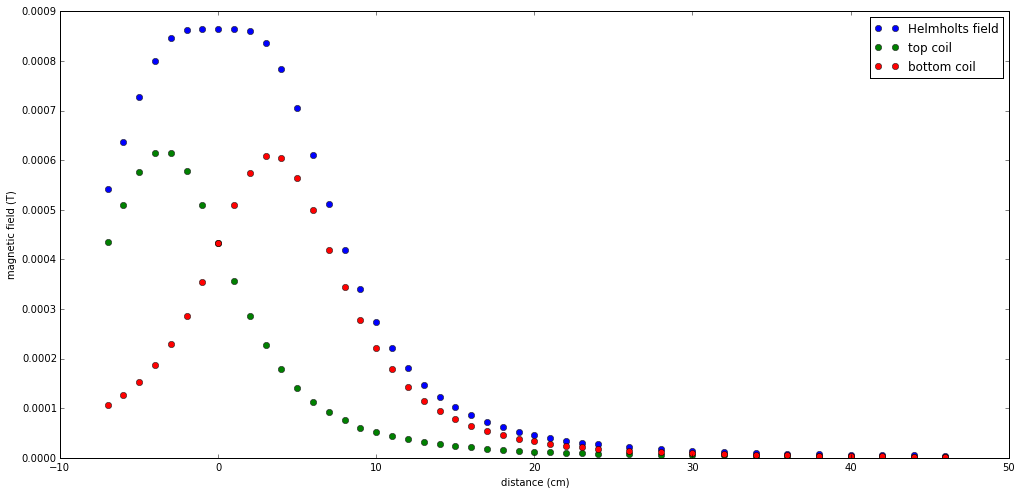

In [18]:
plt.figure(figsize=(17,8))
plt.ylabel('magnetic field (T)')
plt.xlabel('distance (cm)')
plt.plot(yAxisHelm[:43,0],yAxisHelm[:43,1], 'o', label = 'Helmholts field')
#plt.plot(yAxisQuad[:43,0],yAxisQuad[:43,1], 'o', label = 'Quad field')
plt.plot(yCoilOne[:,0],yCoilOne[:,1], 'o', label = 'top coil')
plt.plot(yCoilTwo[:,0],yCoilTwo[:,1], 'o', label='bottom coil')
#plt.plot(yCoilTwoInverted[:,0],yCoilTwoInverted[:,1], 'o', label='bottom coil')
plt.legend(loc = 'upper right')
plt.show()

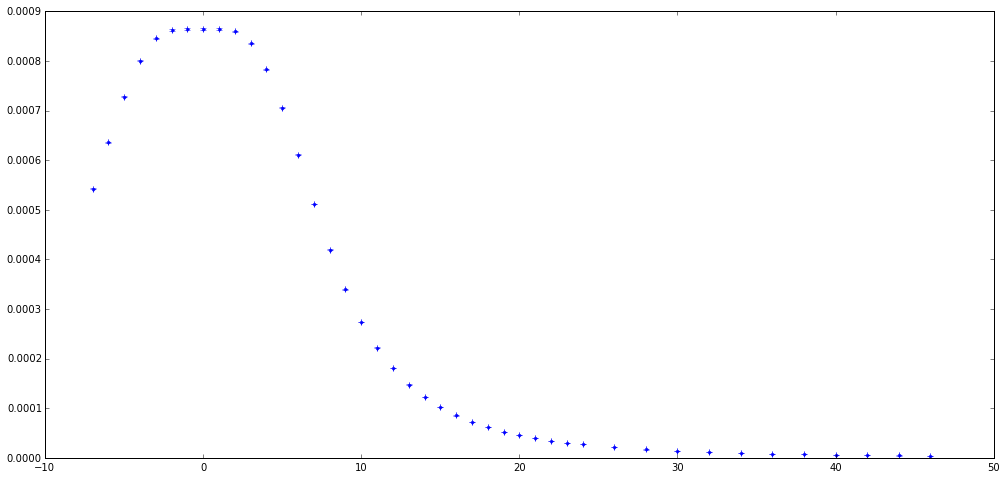

In [19]:
# errorbar plot and theoreitical calulation. 
'''def calc_B_theo(listOfYValues):
    N = 
    m_0 = 
    I = 
    R_z =  # coil mean radius'''

plt.figure(figsize=(17,8))
plt.errorbar(yAxisHelm[:43,0],yAxisHelm[:43,1], yAxisHelmError[:43],yAxisHelmError[:43], '.')
plt.show()

stuff to do:

    convert to errorbar plot,
    make legend,
    find fit function,
    measure coil size = 7cm diameter,
    look up aplications (perhaps present them after our results).

Gradent field stuff:

    calculate theoritical gradent field, 
    calculate measured gradent from spline data fitfuntion 
    compare behavior with actuall data from sprinb
